## ch6 Performance considerations

## 6.1 Memory coalescing

- These consecutive locations accessed and delivered are referred to as **DRAM bursts**
-  the most favorable access pattern is achieved when all threads in a warp access consecutive global memory locations.
In this case, the hardware combines, or coalesces, all these accesses into a consolidated access to consecutive DRAM locations
- Such coalesced access allows the DRAM to deliver data as a burst

### A coalesced access pattern

 - matrix M stored in row-major order  
 consecutive threads iterating through consecutive columns  
 T0 is the element of M that thread 0 is loading, T1 is that of thread 1 loaded,and so on  
 so consecutive threads have access to consecutive columns of M at a percifict time point
 

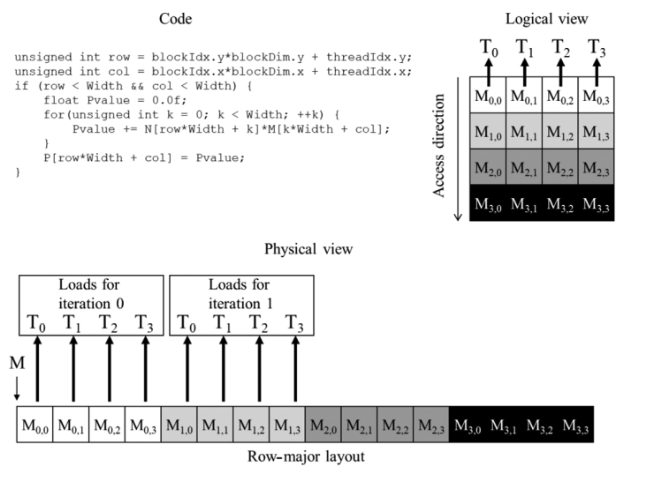

### An uncoalesced access pattern

- matrix M stored in col-major order  
  consecutive threads iterate through consecutive columns when the matrix is stored in column-major order.  
  column number is caculated by threadIdx.x that is unique between threads, so consecutive threads has consecutive column number  
- consecutive threads will access elements of M that are Width apart. Therefore the accesses are not favorable for coalescing.  
- logical view is from the distribution of threads in a block  

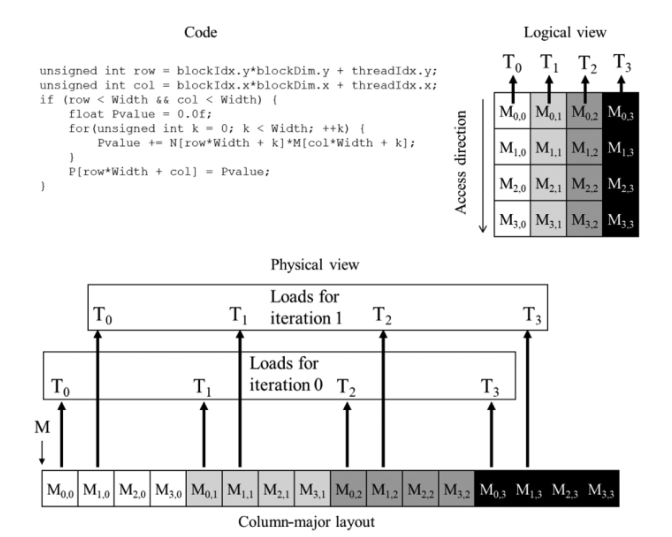

 In iteration 0, consecutive threads will logically access consecutive elements in row 0, but this time they are not adjacent in
memory because of the column-major layout.

#### strategies for optimizing code to achieve memory coalescing
-  rearrange how threads are mapped to the data; 
- another strategy is to rearrange the layout of the data itself
- **corner turning**   
transfer the data between global memory and shared memory in a coalesced manner and carry out the unfavorable access pattern in shared memory

- The main advantage of memory coalescing is that it reduces global memory traffic by combining multiple memory accesses into a single access
- Accesses can be combined when they take place at the same time and access adjacent memory locations

###  parallel organization of the DRAM system
- banks   
- channels

At the highest level, a processor contains one or more channels. Each channel is a memory controller with a bus that connects a set of DRAM banks to the processor

The data transfer bandwidth of a bus is defined by its width and clock frequency.
Modern double data rate (DDR) busses perform two data transfers per clock cycle: one at the rising edge and one at the falling edge of each clock cycle. For example, a 64-bit DDR bus with a clock frequency of 1 GHz has a bandwidth of 8B ? 2 ? 1 GHz=16GB/s.
This seems to be a large number but is often too small for modern CPUs and GPUs. A modern CPU might require a memory bandwidth of at least 32 GB/s, whereas a modern GPU might require 256 GB/s. For this example the CPU would require 2 channels, and the GPU would require 16 channels.
For each channel, the number of banks that is connected to it is determined by the number of banks required to fully utilize the data transfer bandwidth of the bus.

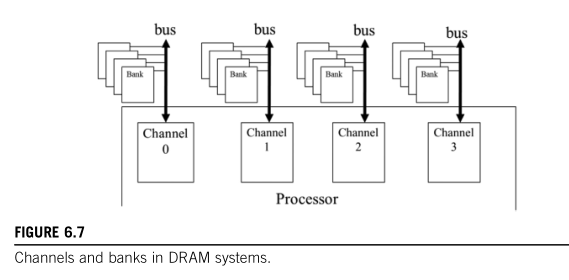

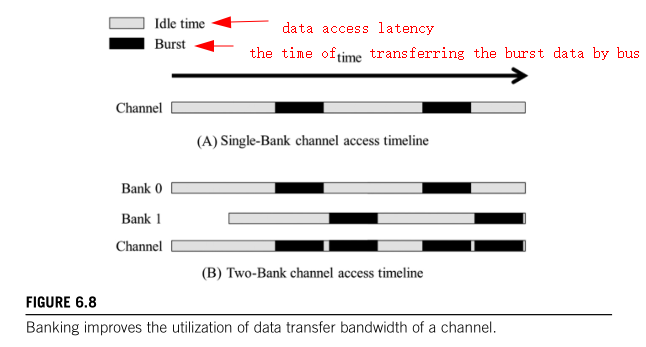

In reality, the access latency (the gray sections) is much longer than the data transfer time (the dark section). It should be apparent that the access transfer tim-
ing of a one-bank organization would grossly underutilize the data transfer bandwidth of the channel bus. For example, if the ratio of DRAM cell array access
latency to the data transfer time is 20:1, the maximal utilization of the channel bus would be 1/21=4.8%; that is a 16 GB/s channel would deliver data to the pro-
cessor at a rate no more than 0.76 GB/s. This would be totally unacceptable. This problem is solved by connecting multiple banks to a channel bus.

we can see that by having two banks, we can potentially double the utilization of the data transfer bandwidth of the channel bus. In gen-
eral, if the ratio of the cell array access latency and data transfer time is R, we need to have at least R + 1 banks if we hope to fully utilize the data transfer bandwidth of the channel bus.

 In general, the number of banks connected to each channel bus needs to be larger than R for two reasons
 - having more banks reduces the probability of multiple simultaneous accesses targeting the same bank, a phenomenon called bank conflict  
 -  the size of each cell array is set to achieve reasonable latency and manufacturability  

There is an important connection between the parallel execution of threads and the parallel organization of the DRAM system  
- To achieve the memory access bandwidth specified for device, there must be a sufficient number of threads making simultaneous memory accesses  
-  Of course, to achieve the best bandwidth utilization, these memory accesses must be evenly distributed across channels and banks, and each access to a bank must also be a coalesced access.

#### interleaved data distribution
 spreads the elements across the banks and channels in the system. This scheme ensures that even relatively small arrays are spread out nicely 
 
 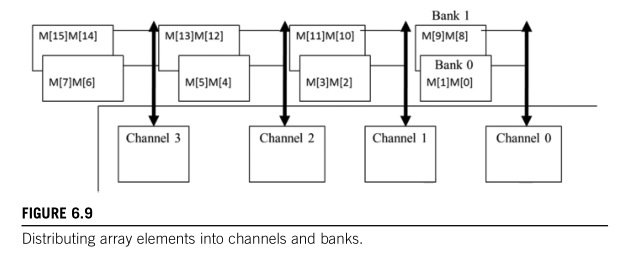

### parallel execution of the threads and the parallel structure of the DRAM system
there is a symbiotic relationship between the parallel execution of the threads and the parallel structure of the DRAM system. 
- On one hand, good utilization of the potential access bandwidth of the DRAM system requires that many threads simultaneously access data in the DRAM. 
- On the other hand, the execution throughput of the device relies on good utilization of the parallel structure of the DRAM system, that is, banks and channels.  
For example, if the simultaneously executing threads all access data in the same channel, the memory access throughput and the overall device execution speed will be greatly reduced.

## 6.3 Thread coarsening

 assigning each thread multiple units of work  
 multiple units of parallelism are assigned to a single thread to reduce the price of parallelism if the hardware was going to serialize the threads anyway.

- Thread coarsening for tiled matrix multiplication.   
a single thread block process the two output tiles, whereby each thread in the block processes two output elements. This way, the coarsened thread block would load the input tiles of M once and reuse them for multiple output tiles.
-  the price of parallelism was loading of the same input M tile redundantly by multiple thread blocks that process adjacent output tiles. In this case, assigning one thread block to process multiple adjacent output tiles enables loading an input tile once for all the output tiles

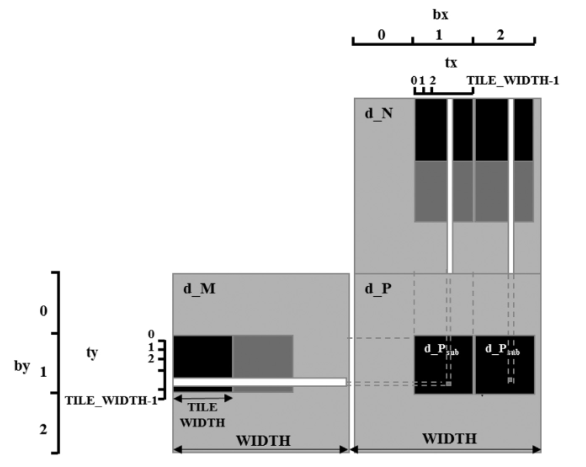

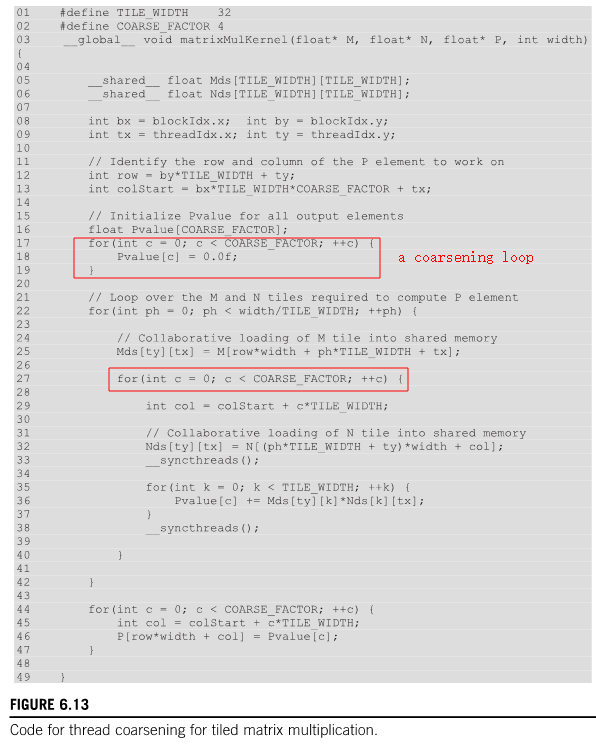

## 6.4 A checklist of optimizations

 ### A checklist of optimizations
 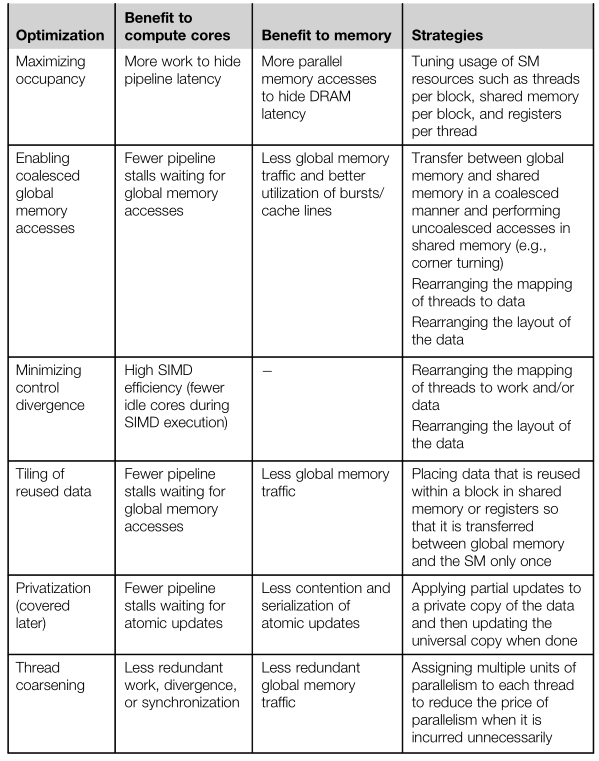